<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/orIC_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/90_sdandard.txt

--2021-05-14 11:52:23--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123928 (121K) [text/plain]
Saving to: ‘positive-sequences.txt’

positive-sequences. 100%[===================>] 121.02K  --.-KB/s    in 0.01s   

2021-05-14 11:52:24 (8.10 MB/s) - ‘positive-sequences.txt’ saved [123928/123928]

--2021-05-14 11:52:24--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, await

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import tensorflow as tf

In [3]:
positive_sequences=open("/content/positive-sequences.txt","r")
negative_sequences=open("/content/negative-sequences.txt","r")

In [4]:
p_data=positive_sequences.readlines()
n_data=negative_sequences.readlines()

In [5]:
p_data=p_data[1::2]
n_data=n_data[1::2]

In [6]:
p=[]
n=[]
size=10
for i in p_data:
  text=i.rstrip("\n")
  holder=""
  for j in range(0,len(text)-size):
    holder+=text[j:j+size]+" "
  p.append(holder)
for i in n_data:
  text=i.rstrip("\n")
  holder=""
  for j in range(0,len(text)-size):
    holder+=text[j:j+size]+" "
  n.append(holder)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [8]:
len(p+n),len(p),len(n)

(811, 405, 406)

In [10]:
tokenizer.fit_on_texts(p+n)

In [11]:
tokenizer.word_index

{'aa': 2,
 'ac': 11,
 'ag': 10,
 'at': 3,
 'ca': 6,
 'cc': 13,
 'cg': 16,
 'ct': 9,
 'ga': 7,
 'gc': 15,
 'gg': 14,
 'gt': 12,
 'ta': 4,
 'tc': 8,
 'tg': 5,
 'tt': 1}

In [12]:
sequences=tokenizer.texts_to_sequences(p+n)

In [13]:
y=[]
for i in range(len(p)):
  y.append(1.0)
for i in range(len(n)):
  y.append(0.0)

In [14]:
from sklearn.utils import shuffle

In [15]:
sequences,y=shuffle(sequences,y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sequences,y)

In [17]:
vocab_size=len(p+n)
embedding_dim=30
max_length=len(p[0])

In [18]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [19]:
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
ACCURACY_THRESHOLD = 0.8
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') > ACCURACY_THRESHOLD):   
          self.model.stop_training = True

In [20]:
callbacks = myCallback()

In [21]:
from tensorflow.keras import backend as K
def error(y_true,y_pred):
  return K.dot(1 - y_true,tf.transpose(y_pred))

In [22]:
model=tf.keras.Sequential([
  tf.keras.layers.Embedding(len(tokenizer.word_index)+1, embedding_dim),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 30)          510       
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 100)               2100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 26,191
Trainable params: 26,191
Non-trainable params: 0
____________________________________________________

In [23]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=31,verbose=1)

Epoch 1/31
19/19 [==============================] - 6s 179ms/step - loss: 0.6933 - accuracy: 0.4845 - val_loss: 0.6932 - val_accuracy: 0.5025
Epoch 2/31
19/19 [==============================] - 2s 119ms/step - loss: 0.6931 - accuracy: 0.4976 - val_loss: 0.6928 - val_accuracy: 0.5123
Epoch 3/31
19/19 [==============================] - 2s 111ms/step - loss: 0.6916 - accuracy: 0.5637 - val_loss: 0.6914 - val_accuracy: 0.5123
Epoch 4/31
19/19 [==============================] - 2s 113ms/step - loss: 0.6872 - accuracy: 0.5471 - val_loss: 0.6893 - val_accuracy: 0.5616
Epoch 5/31
19/19 [==============================] - 2s 110ms/step - loss: 0.6772 - accuracy: 0.5602 - val_loss: 0.6849 - val_accuracy: 0.5369
Epoch 6/31
19/19 [==============================] - 2s 119ms/step - loss: 0.6655 - accuracy: 0.5994 - val_loss: 0.6649 - val_accuracy: 0.6059
Epoch 7/31
19/19 [==============================] - 2s 110ms/step - loss: 0.6424 - accuracy: 0.6228 - val_loss: 0.6385 - val_accuracy: 0.6502
Epoch 

In [24]:
len(x_train),len(y_train)

(608, 608)

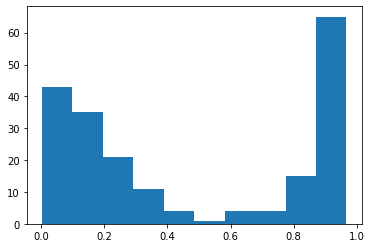

In [25]:
plt.hist(model.predict(x_test))
plt.show()

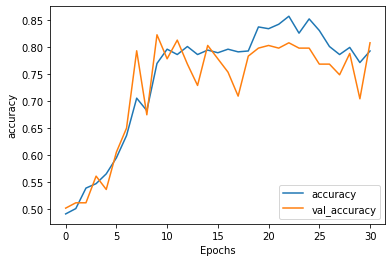

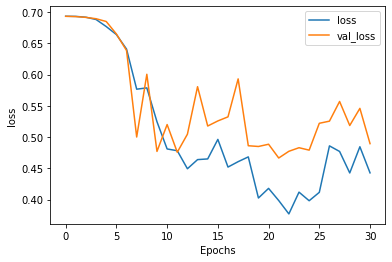

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) 

(65, 30)


In [ ]:
wi=tokenizer.word_index
keys=list(wi.keys())
decode=dict()
val=list(wi.values())
j=0
for i in val:
  decode[i]=keys[j]
  j+=1

In [ ]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1,len(tokenizer.word_index)+1):
  word = decode[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
from google.colab import files
files.download('vecs.tsv')
files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save("model_LSTM(3).h5")